In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display

In [10]:
# Create data
def create_data(m):
    N = 50
    x = torch.randn(N,1)
    y = m * x + torch.randn(N,1)/2
    return x, y

In [21]:
def train_model(x, y, lr=0.05, epochs=500):

    # build model
    ANNreg = nn.Sequential(
        nn.Linear(1,1),
        nn.ReLU(),
        nn.Linear(1,1)
    )

    loss_fun = nn.MSELoss()
    optimizer = torch.optim.SGD(ANNreg.parameters(), lr=lr)    

    losses = torch.zeros(epochs)

    # Train the model
    for it in range(epochs):
        y_hat = ANNreg(x)
        
        loss = loss_fun(y_hat, y)
        losses[it] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    predictions = ANNreg(x)

    return predictions, losses


## Test functions

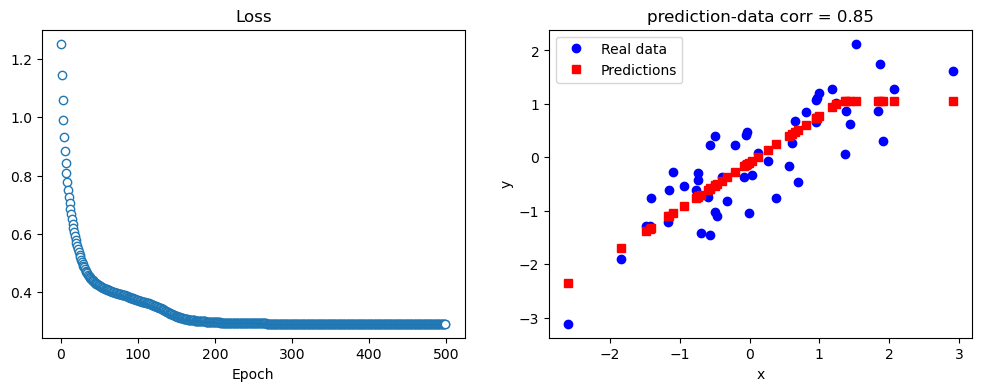

In [22]:
x, y = create_data(.8)

y_hat, losses = train_model(x,y)
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x, y, 'bo', label='Real data')
ax[1].plot(x, y_hat.detach(), 'rs', label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T, y_hat.detach().T)[0,1]:.2f}')
ax[1].legend()

plt.show()

In [29]:
# train the model
slopes = np.linspace(-2,2,21)
num_exp = 5

results = np.zeros((len(slopes), num_exp, 2))
for i in range(len(slopes)):
    for n in range(num_exp):
        
        x, y = create_data(slopes[i])
        y_hat, losses = train_model(x,y)

        results[i, n, 0] = losses[-1]
        results[i, n, 1] = np.corrcoef(y.T, y_hat.detach().T)[0,1]
    
results[np.isnan(results)] = 0

C:\Users\Derrick\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Derrick\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Text(0.5, 1.0, 'Model Performance')

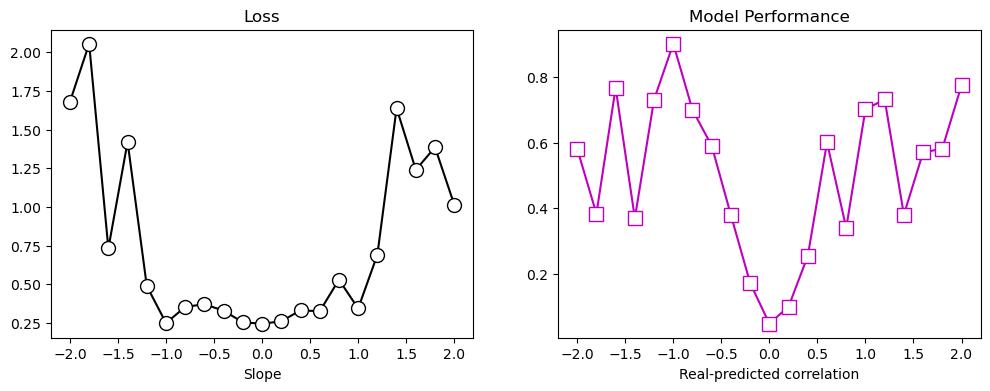

In [30]:
# plot the results

fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(slopes, np.mean(results[:,:,0], axis=1), 'ko-', markerfacecolor='w', markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes, np.mean(results[:,:,1], axis=1), 'ms-', markerfacecolor='w', markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_xlabel('Real-predicted correlation')
ax[1].set_title('Model Performance')